In [1]:
!nvidia-smi

Mon Nov 11 04:16:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from fastai.vision.all import *

#Loading the pre-trained model
learn = load_learner('/content/car_color_model.pkl')

# Using it to predict on a new image
img_path = '/content/pxeisg.jpeg'
img = PILImage.create(img_path)

# Making prediction
pred, pred_idx, probs = learn.predict(img)
print(f'Predicted Label: {pred}, Probability: {probs[pred_idx]:.4f}')


Predicted Label: red, Probability: 0.9580


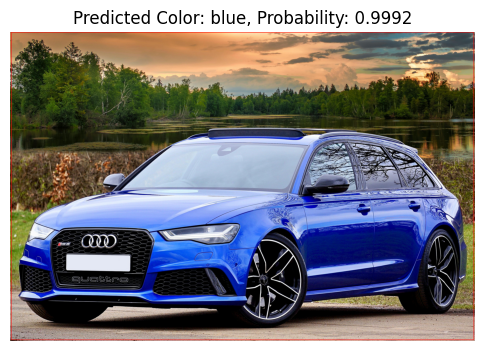

In [6]:
from PIL import ImageDraw
import matplotlib.pyplot as plt
def predict_and_display(img_path):
    # Load the image
    img = PILImage.create(img_path)

    # Make a prediction
    pred, pred_idx, probs = learn.predict(img)

    # Copy the image and prepare to draw a bounding box
    img_with_box = img.copy()
    draw = ImageDraw.Draw(img_with_box)

    # Set box color: red for blue cars, blue for all other colors
    box_color = "red" if pred == "blue" else "blue"
    draw.rectangle([(10, 10), (img.width - 10, img.height - 10)], outline=box_color, width=5)

    # Display the image with matplotlib
    plt.figure(figsize=(6,6))
    plt.imshow(img_with_box)
    plt.axis('off')  # Turn off axis labels
    plt.title(f'Predicted Color: {pred}, Probability: {probs[pred_idx]:.4f}')
    plt.show()

# Testing the function with an example image
img_path = '/content/nlueee.jpg'
predict_and_display(img_path)